#**Objective:- Predict the stage of liver cirrhosis (Stage 1, 2, or 3) using patient clinical data.**
#*Dataset Description*
#Source: Mayo Clinic PBC Study (1974–1984)
Rows: Patients  
Target Variable: Stage  
Problem Type: **Classification**   
Feature Types:Numerical (Age, Bilirubin, Albumin, etc.)  
Categorical (Sex, Drug, Ascites, Edema, etc.)

Importing Required Libraries

Includes:

Data handling (pandas, numpy)

Preprocessing (LabelEncoder, Imputer, Scaler)

Models (Logistic, Tree, Forest, SVM, KNN)

Evaluation metrics

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

#Loading the Dataset

In [ ]:
df = pd.read_csv('/content/liver_cirrhosis.csv')

In [ ]:
df.head()

,N_Days,Status,Drug,Age,Sex,Ascites,Hepatomegaly,Spiders,Edema,Bilirubin,Cholesterol,Albumin,Copper,Alk_Phos,SGOT,Tryglicerides,Platelets,Prothrombin,Stage
0,2221,C,Placebo,18499,F,N,Y,N,N,0.5,149.0,4.04,227.0,598.0,52.70,57.0,256.0,9.9,1
1,1230,C,Placebo,19724,M,Y,N,Y,N,0.5,219.0,3.93,22.0,663.0,45.00,75.0,220.0,10.8,2
2,4184,C,Placebo,11839,F,N,N,N,N,0.5,320.0,3.54,51.0,1243.0,122.45,80.0,225.0,10.0,2
3,2090,D,Placebo,16467,F,N,N,N,N,0.7,255.0,3.74,23.0,1024.0,77.50,58.0,151.0,10.2,2
4,2105,D,Placebo,21699,F,N,Y,N,N,1.9,486.0,3.54,74.0,1052.0,108.50,109.0,151.0,11.5,1


# Checking the data type of columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   N_Days         25000 non-null  int64  
 1   Status         25000 non-null  object 
 2   Drug           25000 non-null  object 
 3   Age            25000 non-null  int64  
 4   Sex            25000 non-null  object 
 5   Ascites        25000 non-null  object 
 6   Hepatomegaly   25000 non-null  object 
 7   Spiders        25000 non-null  object 
 8   Edema          25000 non-null  object 
 9   Bilirubin      25000 non-null  float64
 10  Cholesterol    25000 non-null  float64
 11  Albumin        25000 non-null  float64
 12  Copper         25000 non-null  float64
 13  Alk_Phos       25000 non-null  float64
 14  SGOT           25000 non-null  float64
 15  Tryglicerides  25000 non-null  float64
 16  Platelets      25000 non-null  float64
 17  Prothrombin    25000 non-null  float64
 18  Stage 

# **Exploratory Data Analysis (EDA)**

Exploratory Data Analysis is performed to understand data distribution, relationships between features, and class balance before model training.

#Target Variable Distribution

Helps identify class imbalance among stages.

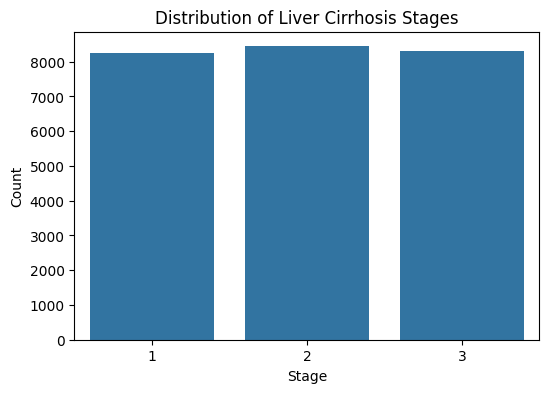

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Stage', data=df)
plt.title('Distribution of Liver Cirrhosis Stages')
plt.xlabel('Stage')
plt.ylabel('Count')
plt.show()

#Age Distribution

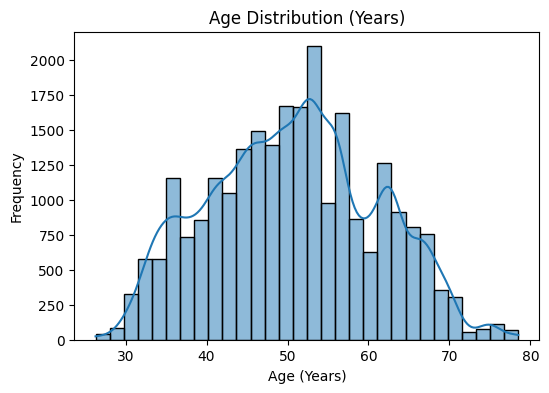

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df['Age']/365, bins=30, kde=True)
plt.title('Age Distribution (Years)')
plt.xlabel('Age (Years)')
plt.ylabel('Frequency')
plt.show()

From this plot we found most patients are middle-aged to elderly.

#Numerical Feature Distribution

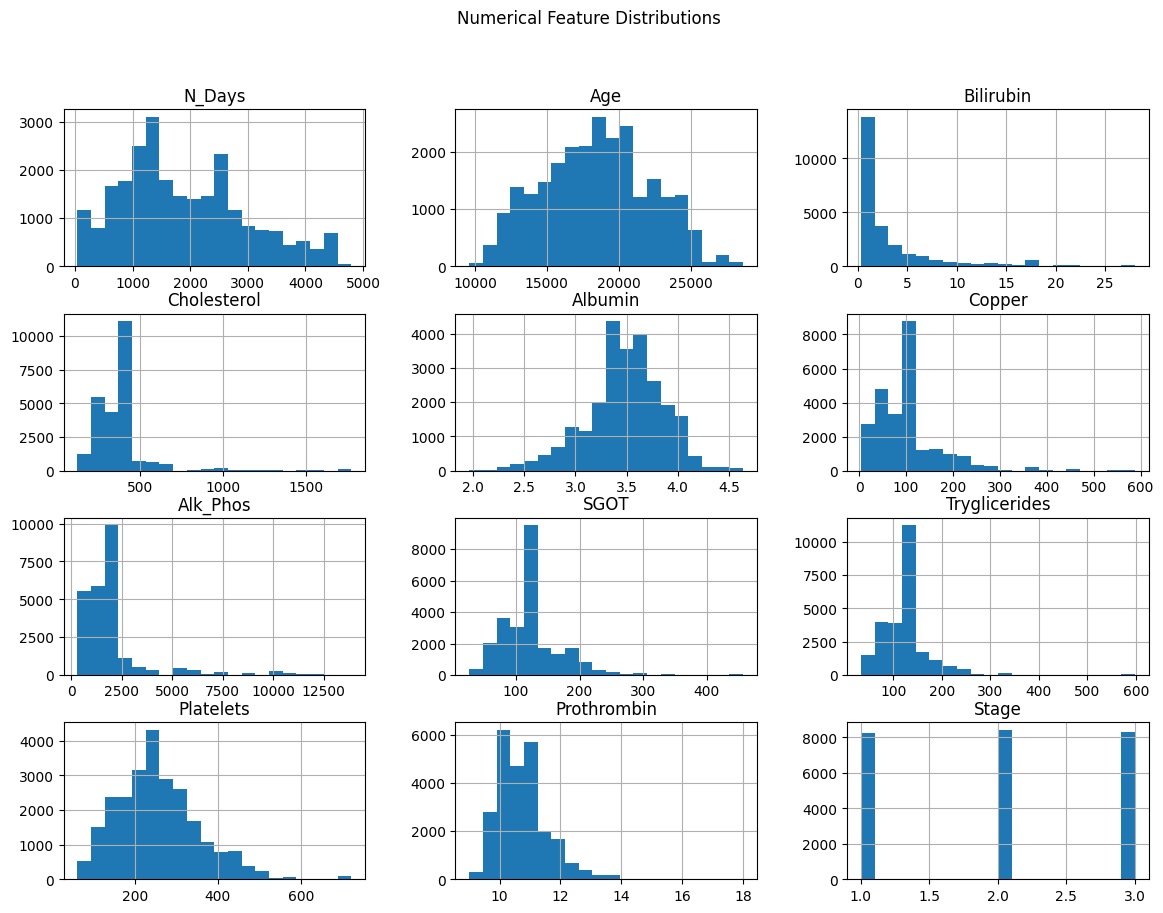

In [ ]:
num_cols = df.select_dtypes(exclude='object').columns
df[num_cols].hist(figsize=(14,10), bins=20)
plt.suptitle('Numerical Feature Distributions')
plt.show()

Identifies skewness and outliers in lab measurements

#Correlation Heatmap

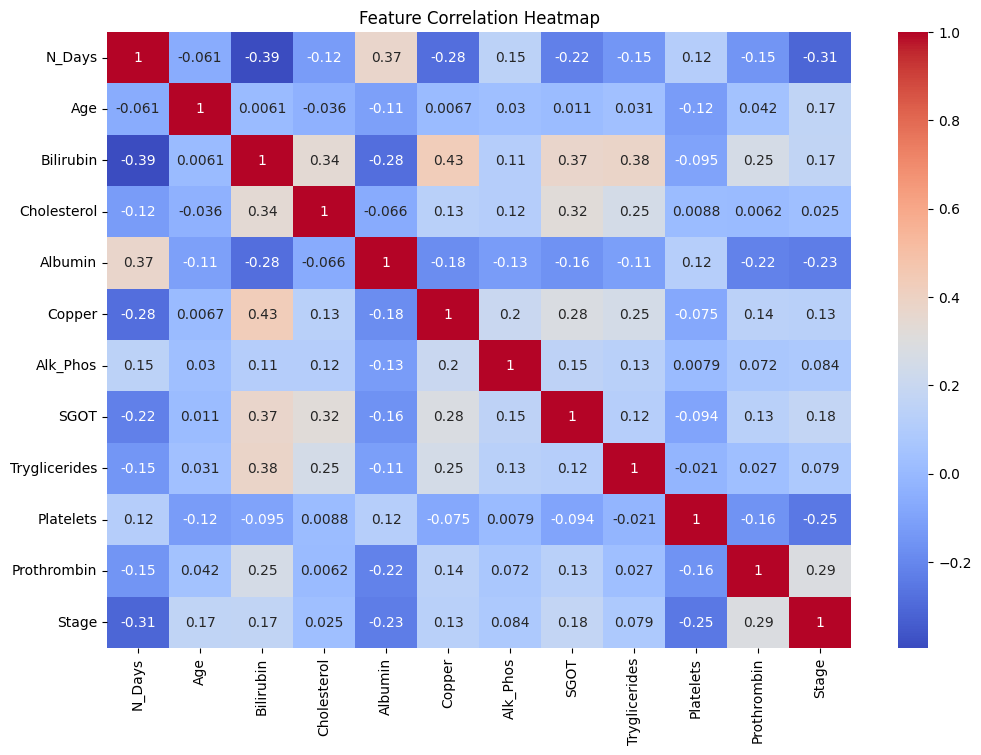

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Feature Correlation Heatmap')
plt.show()

Shows relationships between liver-related biomarkers.

#Key Feature vs Target Analysis

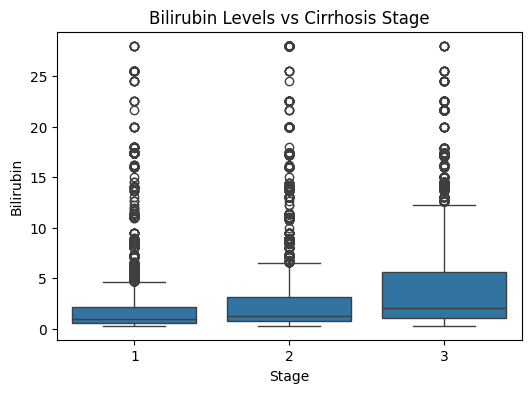

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Stage', y='Bilirubin', data=df)
plt.title('Bilirubin Levels vs Cirrhosis Stage')
plt.show()

Bilirubin levels increase with disease severity.

#Data Cleaning:- Removed rows with missing target (Stage)

In [ ]:
df = df.dropna(subset=['Stage'])

#Separated features (X) and target (y)

In [ ]:
X = df.drop('Stage', axis=1)
y = df['Stage']

# Handling Categorical Columns

In [ ]:
categorical_cols = X.select_dtypes(include='object').columns

#Identified categorical columns

#Applied Label Encoding manually

In [ ]:
label_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    X[col] = X[col].astype(str)
    X[col] = le.fit_transform(X[col])
    label_encoders[col] = le

#Indentifying numerical columns

In [ ]:
numerical_cols = X.select_dtypes(exclude='object').columns

#Handling Missing Values:->

1.   Filling Numerical columns with median
2.   filling Categorical columns with Most Frequent



In [ ]:
num_imputer = SimpleImputer(strategy='median')
X[numerical_cols] = num_imputer.fit_transform(X[numerical_cols])

cat_imputer = SimpleImputer(strategy='most_frequent')
X[categorical_cols] = cat_imputer.fit_transform(X[categorical_cols])

#Feature Scaling:- Needed for Logistic, SVM, KNN
Applied StandardScaler to numerical columns

In [ ]:
scaler = StandardScaler()
X[numerical_cols] = scaler.fit_transform(X[numerical_cols])

#Splitting the data into training and testing data

#Test Size= 80% training and 20% testing

#Used stratify=y because to keep the same class distribution of Stage in both training and test sets.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

#**Training the Models**

# 1).**Logistic Regression**

In [ ]:
log_reg = LogisticRegression(max_iter=1000)

#Fitting the training data to model

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

#Making predictions on test data

In [ ]:
y_pred_lr = log_reg.predict(X_test)

#Computing the Accuracy score,

In [ ]:
acc_lr = accuracy_score(y_test, y_pred_lr)

#Printing the accuracy score, confusion matrix and classification report

In [ ]:
print("Logistic Regression Accuracy:", acc_lr)
print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Logistic Regression Accuracy: 0.5784
[[ 981  434  238]
 [ 508  797  383]
 [ 219  326 1114]]
              precision    recall  f1-score   support

           1       0.57      0.59      0.58      1653
           2       0.51      0.47      0.49      1688
           3       0.64      0.67      0.66      1659

    accuracy                           0.58      5000
   macro avg       0.58      0.58      0.58      5000
weighted avg       0.58      0.58      0.58      5000



#2). Training the **Decision Tree** model

In [ ]:
dt = DecisionTreeClassifier(random_state=42)

#Fitting the training data

In [ ]:
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

#Making predictions

In [ ]:
y_pred_dt = dt.predict(X_test)

#Evaluating the accuracy

In [ ]:
acc_dt = accuracy_score(y_test, y_pred_dt)

#Printing the accuracy score, confusion matrix and classification matrix

In [ ]:
print("Decision Tree Accuracy:", acc_dt)
print(confusion_matrix(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.9118
[[1485  113   55]
 [  97 1536   55]
 [  51   70 1538]]
              precision    recall  f1-score   support

           1       0.91      0.90      0.90      1653
           2       0.89      0.91      0.90      1688
           3       0.93      0.93      0.93      1659

    accuracy                           0.91      5000
   macro avg       0.91      0.91      0.91      5000
weighted avg       0.91      0.91      0.91      5000



#3). Training the **Random Forest** Model

In [ ]:
rf = RandomForestClassifier(n_estimators=200, random_state=42)

#Fitting the training data

In [ ]:
rf.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

#Making the predictions

In [ ]:
y_pred_rf = rf.predict(X_test)

#Evaluating the accuracy

In [ ]:
acc_rf = accuracy_score(y_test, y_pred_rf)

#Printing the metrics

In [ ]:
print("Random Forest Accuracy:", acc_rf)
print(confusion_matrix(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.952
[[1542   81   30]
 [  47 1611   30]
 [  16   36 1607]]
              precision    recall  f1-score   support

           1       0.96      0.93      0.95      1653
           2       0.93      0.95      0.94      1688
           3       0.96      0.97      0.97      1659

    accuracy                           0.95      5000
   macro avg       0.95      0.95      0.95      5000
weighted avg       0.95      0.95      0.95      5000



#4). Training the **Support Vector Machine** Model

In [ ]:
svm = SVC(kernel='rbf')

# Fitting the training data to model

In [ ]:
svm.fit(X_train, y_train)

SVC()

#Making predictions on test data

In [ ]:
y_pred_svm = svm.predict(X_test)

#Evaluating the accuracy

In [ ]:
acc_svm = accuracy_score(y_test, y_pred_svm)

#Printing the metrics of model

In [ ]:
print("SVM Accuracy:", acc_svm)
print(confusion_matrix(y_test, y_pred_svm))
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.817
[[1308  270   75]
 [ 206 1376  106]
 [  86  172 1401]]
              precision    recall  f1-score   support

           1       0.82      0.79      0.80      1653
           2       0.76      0.82      0.78      1688
           3       0.89      0.84      0.86      1659

    accuracy                           0.82      5000
   macro avg       0.82      0.82      0.82      5000
weighted avg       0.82      0.82      0.82      5000



#5). Training the **K-Nearest Neighbour** Model

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5)

# Fitting the training data

In [ ]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

#Making predictions on test data

In [ ]:
y_pred_knn = knn.predict(X_test)

#Evaluating the accuracy of the model

In [ ]:
acc_knn = accuracy_score(y_test, y_pred_knn)

#Printing the metrics of model

In [ ]:
print("KNN Accuracy:", acc_knn)
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

KNN Accuracy: 0.8874
[[1471  119   63]
 [ 152 1477   59]
 [  70  100 1489]]
              precision    recall  f1-score   support

           1       0.87      0.89      0.88      1653
           2       0.87      0.88      0.87      1688
           3       0.92      0.90      0.91      1659

    accuracy                           0.89      5000
   macro avg       0.89      0.89      0.89      5000
weighted avg       0.89      0.89      0.89      5000



#This training the models i could have done in single cell using loops and evaluating the performance of model and comparing to find the best one. But I trained models individually to improve readability, debugging, and clear comparison, especially for explaining results and model behavior

#Converting the results of all the models into dataframe along with their accuracies.

In [ ]:
results = {
    "Logistic Regression": acc_lr,
    "Decision Tree": acc_dt,
    "Random Forest": acc_rf,
    "SVM": acc_svm,
    "KNN": acc_knn
}

results_df = pd.DataFrame({
    "Model": results.keys(),
    "Accuracy": results.values()
}).sort_values(by="Accuracy", ascending=False)

results_df


,Model,Accuracy
2,Random Forest,0.9520
1,Decision Tree,0.9118
4,KNN,0.8874
3,SVM,0.8170
0,Logistic Regression,0.5784


# Choosing the **Best Model**

In [ ]:
best_model_name = results_df.iloc[0]['Model']
print(f"\nBest Model: {best_model_name}")


Best Model: Random Forest


#Making Predictions on new data to find the stage of liver cirhosis of a patient

In [ ]:
new_data = {
    'N_Days': 4000,
    'Status': 'C',
    'Drug': 'D-penicillamine',
    'Age': 21000,
    'Sex': 'F',
    'Ascites': 'N',
    'Hepatomegaly': 'Y',
    'Spiders': 'N',
    'Edema': 'N',
    'Bilirubin': 1.2,
    'Cholesterol': 250,
    'Albumin': 3.8,
    'Copper': 40,
    'Alk_Phos': 1200,
    'SGOT': 45,
    'Tryglicerides': 160,
    'Platelets': 300,
    'Prothrombin': 10.5
}

#Converting the new data into dataframe

In [ ]:
import pandas as pd
new_df = pd.DataFrame([new_data])

#Apply same preprocessing as used in the model training

In [ ]:
for col, le in label_encoders.items():
    new_df[col] = le.transform(new_df[col])

In [ ]:
numerical_cols = scaler.feature_names_in_

new_df[numerical_cols] = scaler.transform(new_df[numerical_cols])

In [ ]:
best_model = models[best_model_name]
prediction = best_model.predict(new_df)
print("Predicted Stage:", prediction[0])

Predicted Stage: 2


#**Random Forest Classifier achieved the highest performance overall.**